In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def plot_n_side_by_side_bars(
    ax: plt.Axes, x_ticks: np.ndarray[int], y_data: pd.DataFrame, space_width=0.3
):
    nbars = y_data.shape[1]
    width = (1 - space_width) / nbars
    for i, col in enumerate(y_data.columns):
        ax.bar(
            x=[x - 0.5 + space_width / 2 + width / 2 + width * i for x in x_ticks],
            height=y_data[col],
            width=width,
            label=col,
        )

### set up data

In [4]:
df = pd.read_csv("data/titanic.csv")
df.shape
print(df.head().to_string())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [5]:
df["age_bin"] = pd.qcut(df["age"], q=10)

grp_dict = {
    "n": ("age_bin", "size"),
    "survival_rate": ("survived", "mean"),
}
for who in df["who"].unique():
    grp_dict[f"survival_rate_{who}"] = ('survived', lambda x, w=who: df.loc[x.index].loc[lambda y:y['who']==w,'survived'].mean())

pdf = df.groupby("age_bin", observed=False, as_index=False).agg(**grp_dict)
print(pdf.head().to_string())

         age_bin   n  survival_rate  survival_rate_man  survival_rate_woman  survival_rate_child
0  (0.419, 14.0]  77       0.584416                NaN                  NaN             0.584416
1   (14.0, 19.0]  87       0.390805           0.102041             0.781250             0.666667
2   (19.0, 22.0]  67       0.283582           0.108696             0.666667                  NaN
3   (22.0, 25.0]  70       0.371429           0.136364             0.769231                  NaN
4   (25.0, 28.0]  61       0.393443           0.255814             0.722222                  NaN


### dodge bars first principle

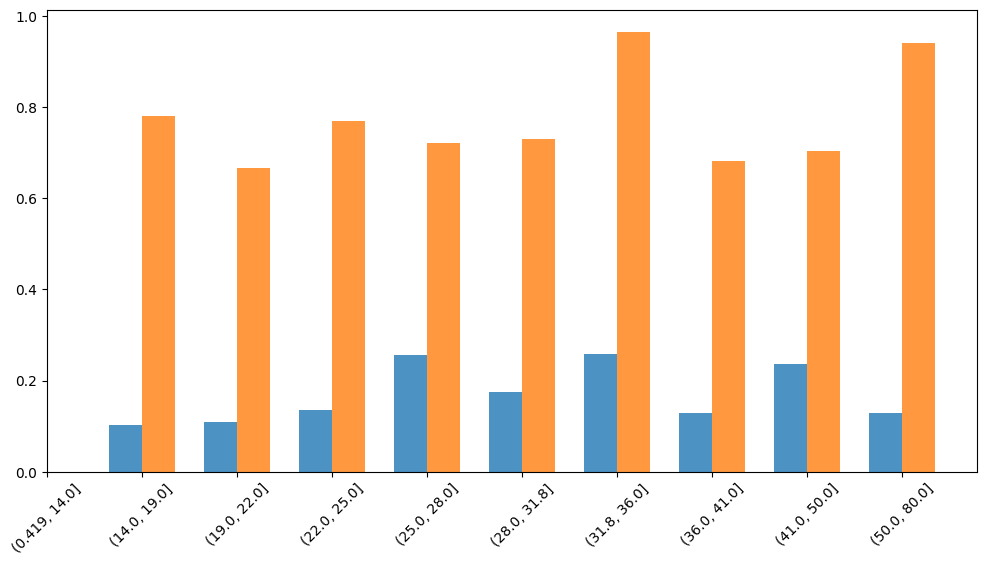

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pdf["age_bin"]))
width = 0.35

ax.bar(
    x - width/2,
    pdf["survival_rate_man"],
    width=width,
    alpha=0.8,
    label="Survival Rate 1",
)
ax.bar(
    x + width/2,
    pdf["survival_rate_woman"],
    width=width,
    alpha=0.8,
    label="Survival Rate 2",
)

_ = ax.set_xticks(x, labels=pdf["age_bin"].astype(str), rotation=45)

### content

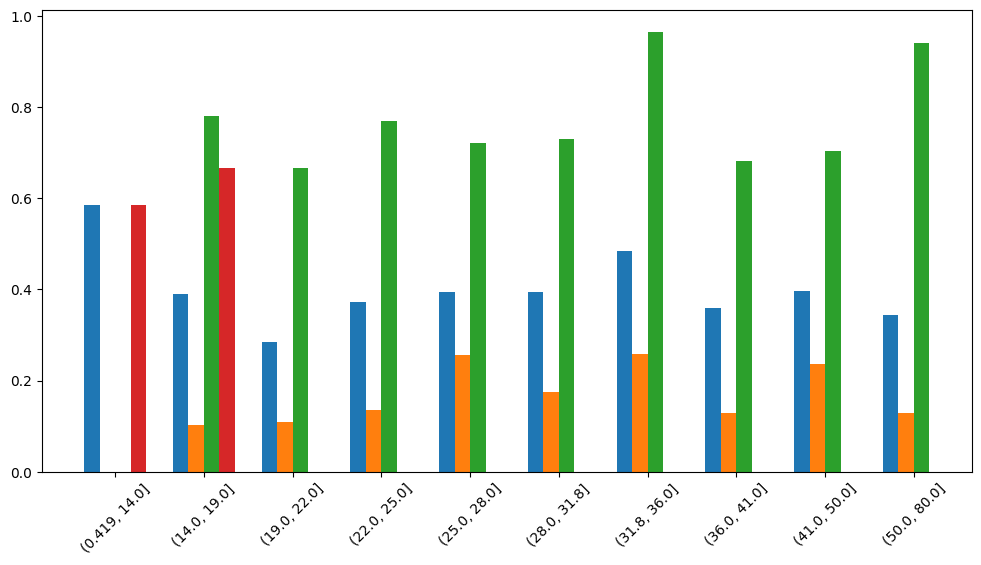

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x_ticks = np.arange(pdf.shape[0])
x_ticklabels = pdf["age_bin"].astype(str)
y_data = pdf[["survival_rate", "survival_rate_man", "survival_rate_woman", "survival_rate_child"]]

plot_n_side_by_side_bars(ax, x_ticks, y_data)
_ = ax.set_xticks(x_ticks, labels=x_ticklabels, rotation=45)

### addons